In [1]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [60]:
train = pd.read_csv('Churn.csv')
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [57]:
train['tenure'] = train.tenure.astype(float)

In [101]:
#train['TotalCharges'] = train.TotalCharges.convert_objects(convert_numeric=True)
train['TotalCharges'] = pd.to_numeric(train['TotalCharges'])

In [102]:
train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [114]:
train_dataset = train[['MonthlyCharges','TotalCharges','tenure','Churn']]
train_dataset.fillna(0, inplace=True)
train_dataset.head()

c:\users\zkqz2633\pycharmprojects\notebook\venv\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,MonthlyCharges,TotalCharges,tenure,Churn
0,29.85,29.85,1,No
1,56.95,1889.50,34,No
2,53.85,108.15,2,Yes
3,42.30,1840.75,45,No
4,70.70,151.65,2,Yes


In [115]:
features = ['MonthlyCharges','TotalCharges','tenure']
x = train_dataset.loc[:, features].values

In [116]:
y = train_dataset.loc[:,['Churn']].values

In [117]:
x = StandardScaler().fit_transform(x)

In [77]:
pd.DataFrame(data = x, columns = features).head()

,MonthlyCharges,TotalCharges,tenure
0,-1.160323,-0.992611,-1.277445
1,-0.259629,-0.172165,0.066327
2,-0.362660,-0.958066,-1.236724
3,-0.746535,-0.193672,0.514251
4,0.197365,-0.938874,-1.236724


In [139]:
pca = PCA(n_components=2)

In [140]:
principalComp = pca.fit_transform(x)

In [141]:
principal_train = pd.DataFrame(data = principalComp
             , columns = ['principal component 1', 'principal component 2'])

In [142]:
principal_train.head(5)

,principal component 1,principal component 2
0,-1.948441,0.083511
1,-0.202988,0.235437
2,-1.514833,-0.521805
3,-0.199743,0.891781
4,-1.229988,-0.964445


In [143]:
train_dataset[['Churn']].head()

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [144]:
final_train = pd.concat([principal_train, train_dataset[['Churn']]], axis = 1)
final_train.head(5)

,principal component 1,principal component 2,Churn
0,-1.948441,0.083511,No
1,-0.202988,0.235437,No
2,-1.514833,-0.521805,Yes
3,-0.199743,0.891781,No
4,-1.229988,-0.964445,Yes


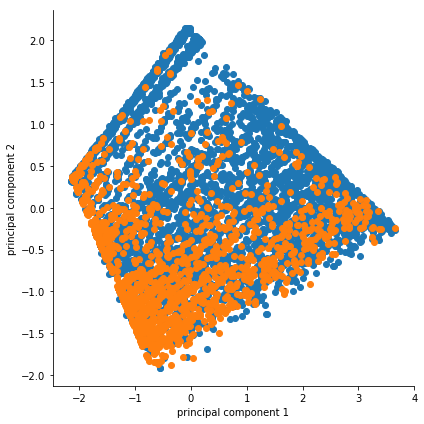

In [145]:
import seaborn as sn
sn.FacetGrid(final_train, hue='Churn',height=6).map(plt.scatter, 'principal component 1', 'principal component 2')
plt.show()

In [146]:
pca.explained_variance_ratio_

array([0.72688838, 0.2532581 ])